### Домашнє завдання: Пониження розмірностей для Аналізу Портретів Клієнтів

#### Контекст
В цьому ДЗ ми попрацюємо з методами пониження розмірності на наборі даних для задачі аналізу портретів клієнтів (Customer Personality Analysis). **В попередньому ДЗ ми працювали з цими даними використовуючи кластеризацію, зараз використаємо кластеризацію і візуалізауємо результати з різними методами.**

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


Для початку, запустіть код нижче. Всі ці кроки ми робили в попередньому ДЗ і для того, щоб результати кластеризації у нас були схожими, потрібно аби передобробка була однаковою.

In [24]:
import pandas as pd

# 1. Завантаження даних
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# 2. Обробка пропущених значень
df['Income_not_filled'] = df.Income.isna()
df.Income = df.Income.fillna(-1)

# 3. Обробка дати реєстрації
df.Dt_Customer = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y')
today = df.Dt_Customer.max()
df['days_lifetime'] = (today - df.Dt_Customer).dt.days
df['years_customer'] = df.Year_Birth.apply(lambda x: today.year - x)

# 4. Категоризація рівня освіти
df_education = pd.get_dummies(df.Education, prefix='education').astype(int)
df = pd.concat([df, df_education], axis=1)

# 5. Очищення сімейного стану
marital_status_map = {'Alone': 'Single', 'Absurd': 'Else', 'YOLO': 'Else'}
df['Marital_Status_clean'] = df.Marital_Status.map(marital_status_map)
df_ms = pd.get_dummies(df.Marital_Status_clean, prefix='marital').astype(int)
df = pd.concat([df, df_ms], axis=1)

# 6. Форматування доходу і видалення викиду
df.Income = df.Income.astype(int)
df = df[df.Income != 666666]

# 7. Створення фінального набору даних
X = df.drop(['ID', 'Dt_Customer', 'Education', 'Marital_Status', 'Marital_Status_clean'], axis=1)
X.reset_index(drop=True, inplace=True)

### Завдання 1: Виконання кластеризації та пониження розмірності для візуалізації результатів

Ваше завдання — провести кластеризацію клієнтів та візуалізувати результати кластеризації, використовуючи метод головних компонент (PCA) для пониження розмірності даних.

#### Інструкції:

1. **Вибір ключових характеристик:**
   Давайте обмежимось тільки наступними хараткеристиками для кластеризації цього разу:
   - `Income`: Річний дохід домогосподарства клієнта
   - `Recency`: Кількість днів з моменту останньої покупки клієнта
   - `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
   - `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
   - `days_lifetime`: Кількість днів з моменту реєстрації клієнта у компанії
   - `years_customer`: Вік клієнта
   - `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць
   Відберіть в наборі даних `X` лише ці характеристики.

2. **Нормалізація даних:**
   Використайте метод `MinMaxScaler` для нормалізації значень обраних характеристик.

3. **Кластеризація:**
   Проведіть кластеризацію клієнтів, використовуючи метод `KMeans` з трьома кластерами.

4. **Пониження розмірності:**
   Використайте метод головних компонент (PCA) для пониження розмірності даних до трьох компонент.

5. **Візуалізація результатів:**
   Використовуючи plolty express побудуйте 3D-графік розподілу клієнтів у просторі трьох головних компонент, де кольором позначено кластери.

6. **Опишіть, що спостерігаєте:**
   Чи кластеризація чітко розділила дані?

Далі ми детальніше проінтерпретуємо результати візуалізації і пониження розмірностей.

In [41]:
X = df[['Income', 'Recency', 'NumStorePurchases', 'NumDealsPurchases', 'days_lifetime', 'years_customer', 'NumWebVisitsMonth']].copy()

In [53]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_std = sc.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X_std)

labels = kmeans.predict(X_std)
print(labels)

[2 1 1 ... 0 1 2]


In [55]:
from sklearn import metrics

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X_std, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.20


In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=0)

In [25]:
df['Response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2239, dtype: int64

In [95]:
import plotly.express as px
import numpy as np

pca_X = pca.fit_transform(X_std)

# Create a DataFrame for Plotly Express
df_1 = pd.DataFrame(data=pca_X, columns=['PC1', 'PC2', 'PC3'])
df_1['target'] = labels

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    df_1,
    x='PC1',
    y='PC2',
    z='PC3',
    hover_data='target',
    color='target',
    title='3D Scatter Plot with PCA'
)

# Show the figure
fig.show()

Кластеризація чітко розділила дані

### Завдання 2: Аналіз результатів пониження розмірності

1. **Розрахунок частки поясненої дисперсії:**
   Визначте, яка частка загальної варіації даних пояснюється кожною з трьох головних компонент (PC1, PC2, PC3) за допомогою атрибуту `explained_variance_ratio_` об'єкта PCA. Виведіть результат на екран.

2. **Розрахунок кумулятивної частки поясненої дисперсії:**
   Обчисліть кумулятивну частку поясненої дисперсії для трьох головних компонент, щоб зрозуміти, скільки варіації даних пояснюється першими кількома компонентами.

In [49]:
pca.explained_variance_ratio_

array([0.30203449, 0.2866534 , 0.25122414])

In [50]:
np.sum(pca.explained_variance_ratio_)

0.8399120325811188

In [51]:
np.cumsum(pca.explained_variance_ratio_)

array([0.30203449, 0.5886879 , 0.83991203])

### Завдання 3: Інтерпретація "Loadings"

Продовжуємо інтерпретацію результатів `PCA`і познайомимось з новим поняттям `loadings`, яке допоможе нам знайти звʼязок між головними компонентами і оригінальними ознаками в наборі даних.

Ми зараз побудували візуалізацію кластерів точок даних в просторі трьох головних компонент. Але хочеться знайти звʼязок між головними компонентами і оригінальними ознаками. Для розуміння, які початкові характеристики даних мають найбільший вплив на ці головні компоненти, ми можемо використати атрибут `components_` методу `PCA`.

#### Що таке `pca.components_`?

`pca.components_` — це масив, який містить коефіцієнти (або "ваги"), що показують внесок кожної вихідної ознаки у кожну з головних компонент. Ці коефіцієнти ще називаються **"loading"** або "навантаженнями" компонент.

- **Loadings** (`навантаження`) відображають важливість кожної змінної (ознаки) для відповідної головної компоненти. Вони показують, яким чином змінні поєднуються, щоб утворити нові, зменшені вимірювання.
- Якщо коефіцієнт має високе абсолютне значення (як позитивне, так і негативне), це вказує на те, що відповідна змінна сильно впливає на головну компоненту.

#### Саме завдання
Ваше завдання — обчислити "навантаження" для кожної з головних компонент і інтерпретувати результати.

1. **Обчислення loadings для компонент:**
   Використайте атрибут `components_` об'єкта PCA для створення DataFrame, який відображатиме внесок кожної вихідної ознаки в кожну головну компоненту.

2. **Інтерпретація результатів:**
   Виведіть значення "навантажень" і проаналізуйте, які ознаки найбільше впливають на кожну головну компоненту.

In [58]:
feature_names = X_std.columns

# Створення DataFrame для loadings
loadings = pd.DataFrame(pca.components_.T,  # Транспоновано, щоб кожен стовпчик був компонентом
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=feature_names)

# Виводимо loadings
print("Loadings (навантаження):")
print(loadings)

Loadings (навантаження):
                        PC1       PC2       PC3
Income             0.063557 -0.047082  0.373826
Recency            0.475786  0.878876  0.029910
NumStorePurchases  0.284282 -0.187195  0.816668
NumDealsPurchases  0.103049 -0.059324 -0.050687
days_lifetime      0.821912 -0.431061 -0.305490
years_customer     0.012658  0.001022  0.080411
NumWebVisitsMonth  0.049530 -0.031377 -0.300089


In [59]:
for i in range(pca.n_components_):
    pc = f'PC{i+1}'
    print(f"\nТоп-ознаки для {pc}:")
    print(loadings[pc].abs().sort_values(ascending=False).head(5))


Топ-ознаки для PC1:
days_lifetime        0.821912
Recency              0.475786
NumStorePurchases    0.284282
NumDealsPurchases    0.103049
Income               0.063557
Name: PC1, dtype: float64

Топ-ознаки для PC2:
Recency              0.878876
days_lifetime        0.431061
NumStorePurchases    0.187195
NumDealsPurchases    0.059324
Income               0.047082
Name: PC2, dtype: float64

Топ-ознаки для PC3:
NumStorePurchases    0.816668
Income               0.373826
days_lifetime        0.305490
NumWebVisitsMonth    0.300089
years_customer       0.080411
Name: PC3, dtype: float64


###Завдання 4
Давайте проаналізуємо "навантаження" (**loadings**) для трьох головних компонент після вилучення ознаки `Income`. Це допоможе нам зрозуміти, як змінилася важливість інших ознак для кожної головної компоненти, коли одна з ключових характеристик (`Income`) була вилучена.

#### Кроки для проведення аналізу і ваше завдання:

1. Видаліть ознаку `Income` з нашого набору даних `X` і повторно виконайте PCA (метод головних компонент) для отримання нових "навантажень".

2. Обчисліть нові "навантаження" для трьох головних компонент на наборі даних без `Income`

3. Проаналізуйте, які ознаки мають найбільший вплив на кожну головну компоненту після вилучення `Income`.

4. Перегляньте, наскільки кожна з головних компонент пояснює дисперсію в даних без ознаки `Income`.

In [63]:
X_std.drop('Income', axis=1, inplace=True)

In [65]:
pca_X = pca.fit_transform(X_std)
feature_names = X_std.columns

loadings = pd.DataFrame(pca.components_.T,  
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=feature_names)

print("Loadings (навантаження):")
print(loadings)

Loadings (навантаження):
                        PC1       PC2       PC3
Recency            0.500712  0.865392  0.008648
NumStorePurchases  0.226953 -0.145537  0.924549
NumDealsPurchases  0.105012 -0.065833 -0.027582
days_lifetime      0.825793 -0.472036 -0.232275
years_customer     0.007110  0.005913  0.079808
NumWebVisitsMonth  0.069051 -0.052233 -0.289919


In [66]:
for i in range(pca.n_components_):
    pc = f'PC{i+1}'
    print(f"\nТоп-ознаки для {pc}:")
    print(loadings[pc].abs().sort_values(ascending=False).head(5))


Топ-ознаки для PC1:
days_lifetime        0.825793
Recency              0.500712
NumStorePurchases    0.226953
NumDealsPurchases    0.105012
NumWebVisitsMonth    0.069051
Name: PC1, dtype: float64

Топ-ознаки для PC2:
Recency              0.865392
days_lifetime        0.472036
NumStorePurchases    0.145537
NumDealsPurchases    0.065833
NumWebVisitsMonth    0.052233
Name: PC2, dtype: float64

Топ-ознаки для PC3:
NumStorePurchases    0.924549
NumWebVisitsMonth    0.289919
days_lifetime        0.232275
years_customer       0.079808
NumDealsPurchases    0.027582
Name: PC3, dtype: float64


### Завдання 5: Візуалізація кластеризації за допомогою t-SNE

Ваше завдання — використати метод t-SNE для візуалізації результатів кластеризації клієнтів у двовимірному просторі. Метод t-SNE допомагає знизити розмірність даних та зберегти локальні структури в даних, що робить його ефективним для візуалізації високорозмірних даних. Ми також зможемо порівняти результат цього методу з РСА.

1. Використайте метод t-SNE для зниження розмірності до 2х вимірів даних, які включають ознаки всі, що і в завданні 1, а також були відмасштабовані перед пониженням розмірностей.

2. Створіть новий DataFrame з координатами, отриманими після застосування t-SNE, та додайте до нього мітки кластерів.

3. Побудуйте інтерактивний 2D-графік розподілу клієнтів, де кольором буде позначено різні кластери і проаналізуйте графік з рекомендаціями нижче (можливо треба буде вивести додаткові візуалізації чи таблиці для інтерпретації, але треба прям зрозуміти, які ознаки формують який кластер і чим кластери відрізняються одне від одного).

  **Опишіть отримані кластери з точки зору ознак.**

4. Опишіть відмінність графіка tSNE від PCA.

#### ЯК можна інтерпретувати з t-SNE?

Хоча t-SNE не надає "компонентів" як РСА, він забезпечує низьковимірне представлення даних, яке можна візуально інтерпретувати:

- **Кластери:** t-SNE особливо добре показує кластери подібних точок. Якщо ви бачите чітко визначені кластери на графіку t-SNE, це свідчить про наявність груп схожих спостережень у ваших даних. Проаналізувати їх можемо, якщо додамо дані в `hover_data` або якщо якісь з даних виведемо як розмір чи форма точок на візуалізації. Також корисно може бути вивести середні значення ознак по кластерам.
- **Локальна структура:** Відносне розташування точок одного кластеру на графіку t-SNE може допомогти вам зрозуміти, які дані подібні між собою.
- **Глобальна структура:** Будьте обережні; t-SNE менш надійний для відображення глобальних структур (наприклад, відстаней між кластерами) у порівнянні з PCA, бо t-SNE націлений на збереження саме локальних структур.

In [67]:
X = df[['Income', 'Recency', 'NumStorePurchases', 'NumDealsPurchases', 'days_lifetime', 'years_customer', 'NumWebVisitsMonth']].copy()

In [69]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_st = sc.fit_transform(X)
X_st = pd.DataFrame(X_st, columns=X.columns)

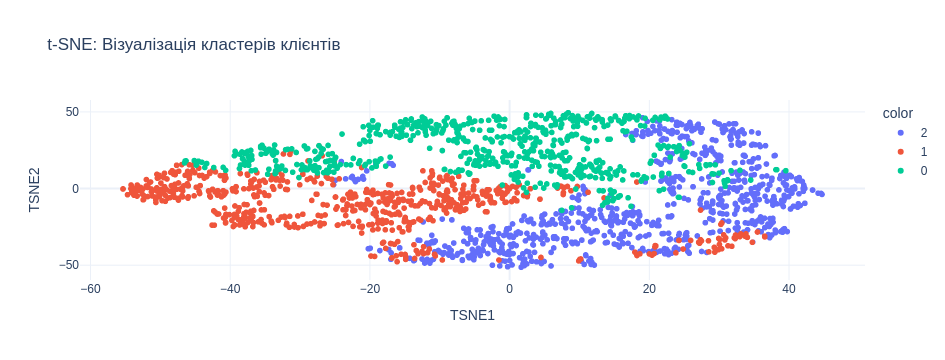

In [91]:
%matplotlib inline
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2, random_state=0)
tsne_digits = tsne.fit_transform(X_st)

tsne_digits = pd.DataFrame(tsne_digits, columns=['TSNE1', 'TSNE2'])

tsne_digits['cluster'] = labels

fig = px.scatter(
    tsne_digits,
    x='TSNE1',
    y='TSNE2',
    color=tsne_digits['cluster'].astype(str),
    hover_data='cluster',
    title='t-SNE: Візуалізація кластерів клієнтів',
    template='plotly_white'
)
fig.show()


In [93]:
df_clusters = X_st.copy()
df_clusters['cluster'] = labels  
cluster_summary = df_clusters.groupby('cluster').mean().round(2)

print("Середні значення ознак по кожному кластеру:")
print(cluster_summary)

Середні значення ознак по кожному кластеру:
         Income  Recency  NumStorePurchases  NumDealsPurchases  days_lifetime  \
cluster                                                                         
0          0.30     0.75               0.39               0.13           0.32   
1          0.32     0.21               0.44               0.13           0.33   
2          0.32     0.52               0.50               0.20           0.80   

         years_customer  NumWebVisitsMonth  
cluster                                     
0                  0.27               0.25  
1                  0.26               0.24  
2                  0.27               0.30  


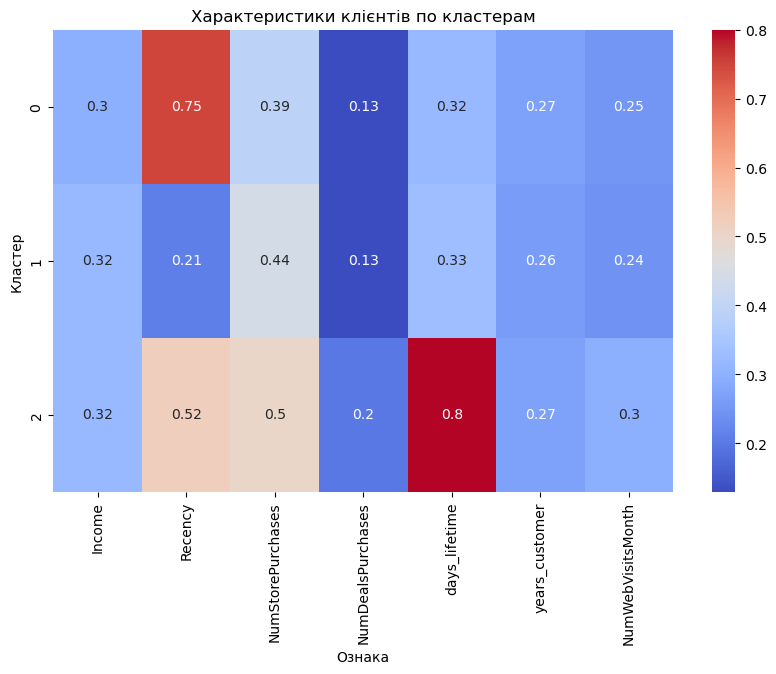

In [94]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm')
plt.title("Характеристики клієнтів по кластерам")
plt.ylabel("Кластер")
plt.xlabel("Ознака")
plt.show()

Кластер 0
- Recency (0.75) – клієнти давно не робили покупок.
- Income (0.3) – середній рівень доходу.
- NumStorePurchases (0.39) – помірна кількість покупок у магазинах.
- NumDealsPurchases (0.13) – рідко купують зі знижками.
- Days_lifetime (0.32) – не так давно приєдналися до компанії.
- years_customer (0.27) – молоді клієнти.
- NumWebVisitsMonth (0.25) – нечасто відвідують сайт.

Інтерпретація: Це нові, молоді клієнти із середнім доходом, які довго не здійснювали покупок і слабко взаємодіють із компанією. Потребують повторної активації.

Кластер 1
- Recency (0.21) – недавно здійснили покупку.
- Income (0.32) – схожий до Кластеру 0.
- NumStorePurchases (0.44) – дещо активніші у магазинах.
- NumDealsPurchases (0.13) – також рідко купують по знижках.
- Days_lifetime (0.33) – нові клієнти.
- years_customer (0.26) – також молоді.
- NumWebVisitsMonth (0.24) – невисока активність на сайті.

Інтерпретація: Молоді клієнти, які недавно долучились і зробили покупку. Їх можна заохотити до частішої взаємодії та покупок онлайн або зі знижками.

Кластер 2
- Recency (0.52) – не зовсім неактивні, але й не дуже свіжі покупці.
- Income (0.32) – аналогічно іншим.
- NumStorePurchases (0.5) – найбільша кількість покупок у магазинах.
- NumDealsPurchases (0.2) – активніше користуються знижками.
- Days_lifetime (0.8) – давно з компанією.
- years_customer (0.27) – молоді клієнти.
- NumWebVisitsMonth (0.3) – найактивніше відвідують сайт.

Інтерпретація: Лояльні, досвідчені клієнти, які часто роблять покупки (особливо зі знижками) і проявляють вищу цифрову активність. Варто зосередитись на утриманні та преміальних пропозиціях.

Висновок:

Кластери відрізняються активністю, досвідом та взаємодією з каналами (сайт, магазин).

Доходи та вік клієнтів у всіх кластерах схожі, тож ключові відмінності – у поведінкових ознаках.

Відмінності графіка tSNE від PCA

PCA зберігає локальну структуру, в той час як tSNE локальну. У PCA компоненти є напрямами дисперсії. tSNE не має чіткої інтерпритації осей. PCA — це лінійний метод зниження розмірності, який зберігає глобальну структуру даних і допомагає виявити основні напрямки варіації, тоді як t-SNE — нелінійний, стохастичний метод, що зосереджується на збереженні локальних зв’язків і добре підходить для візуалізації кластерів у високовимірних даних, хоч і може спотворювати загальну структуру.